In [1]:
import sys,os
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import ggplot, aes, facet_grid, labs, geom_point, geom_line, theme, element_blank

## my own libs
extra_path = "/Users/rbansal/src/election_metrics/lib" # whatever it is
if extra_path not in sys.path:
    sys.path.append(extra_path)

from india_data import *
from indices import *
from plot_metrics import *

In [2]:
## lets load some data!!!                                                                                                                                                                  

election_data = "/Users/rbansal/src/election_metrics/data/"
us_pres_df = read_us_data(election_data)
india_loksabha_df = read_india_data(election_data)

## run the calculations
india_outputs = calc_indices_india(india_loksabha_df)
us_outputs = calc_indices_us(us_pres_df)

 bhavnani_df: (73081, 13)
 kaggle_2019_df: (2263, 20)
 ls_df: (75344, 9)


******Fixing State names****



States/UTs:
['andaman & nicobar islands' 'andhra pradesh' 'arunachal pradesh' 'assam'
 'bihar' 'chandigarh' 'chattisgarh' 'goa et al' 'nct delhi' 'gujarat'
 'haryana' 'himachal pradesh' 'jammu & kashmir' 'jharkhand' 'karnataka'
 'kerala' 'lakshadweep' 'madhya pradesh' 'maharashtra' 'manipur'
 'meghalaya' 'mizoram' 'nagaland' 'odisha' 'puducherry' 'punjab'
 'rajasthan' 'sikkim' 'tamil nadu' 'tripura' 'uttar pradesh' 'uttarakhand'
 'west bengal' 'telangana']

Num states: 34


******Fixing PC names****.....


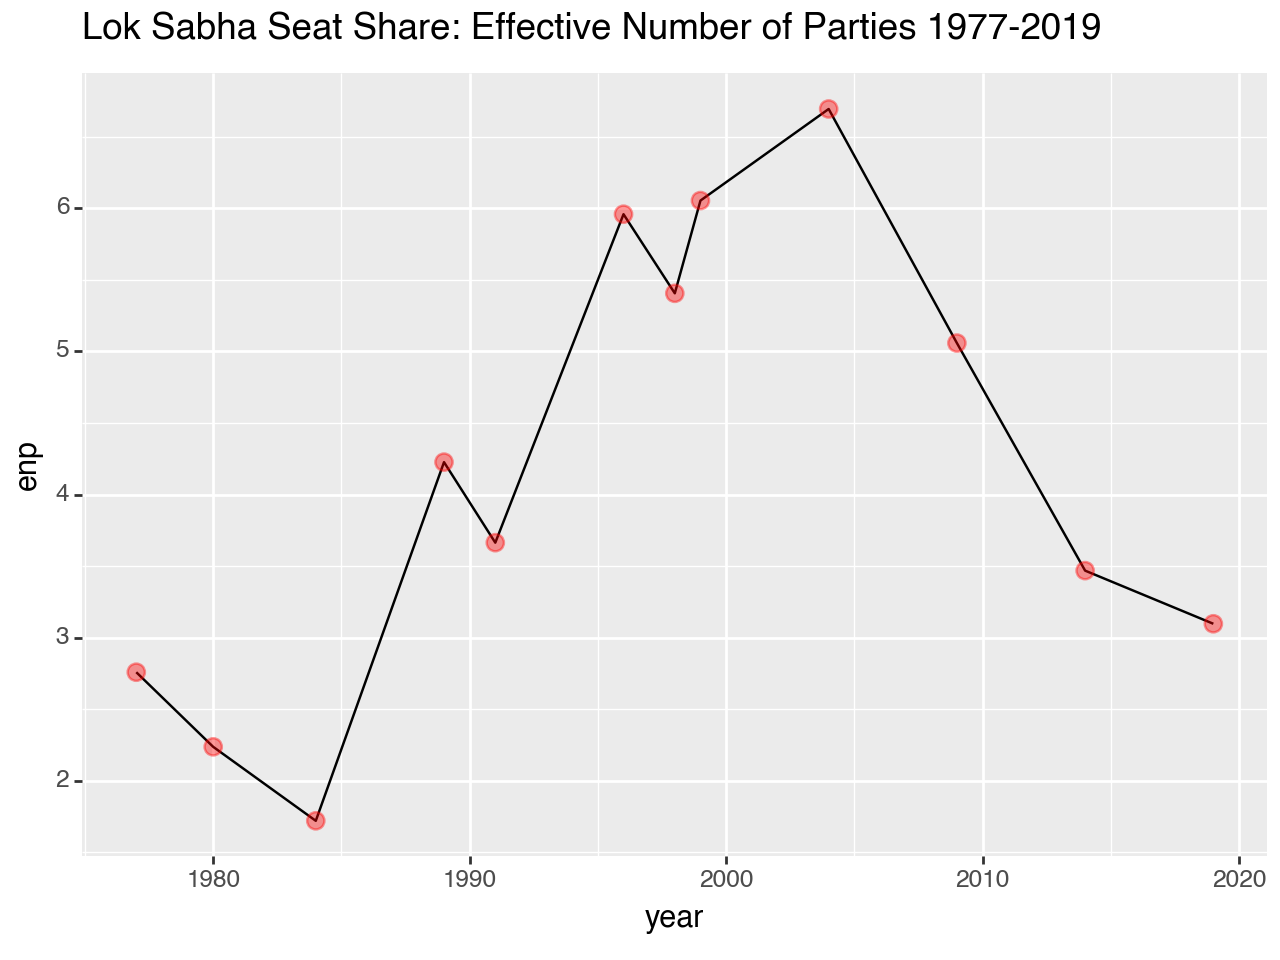

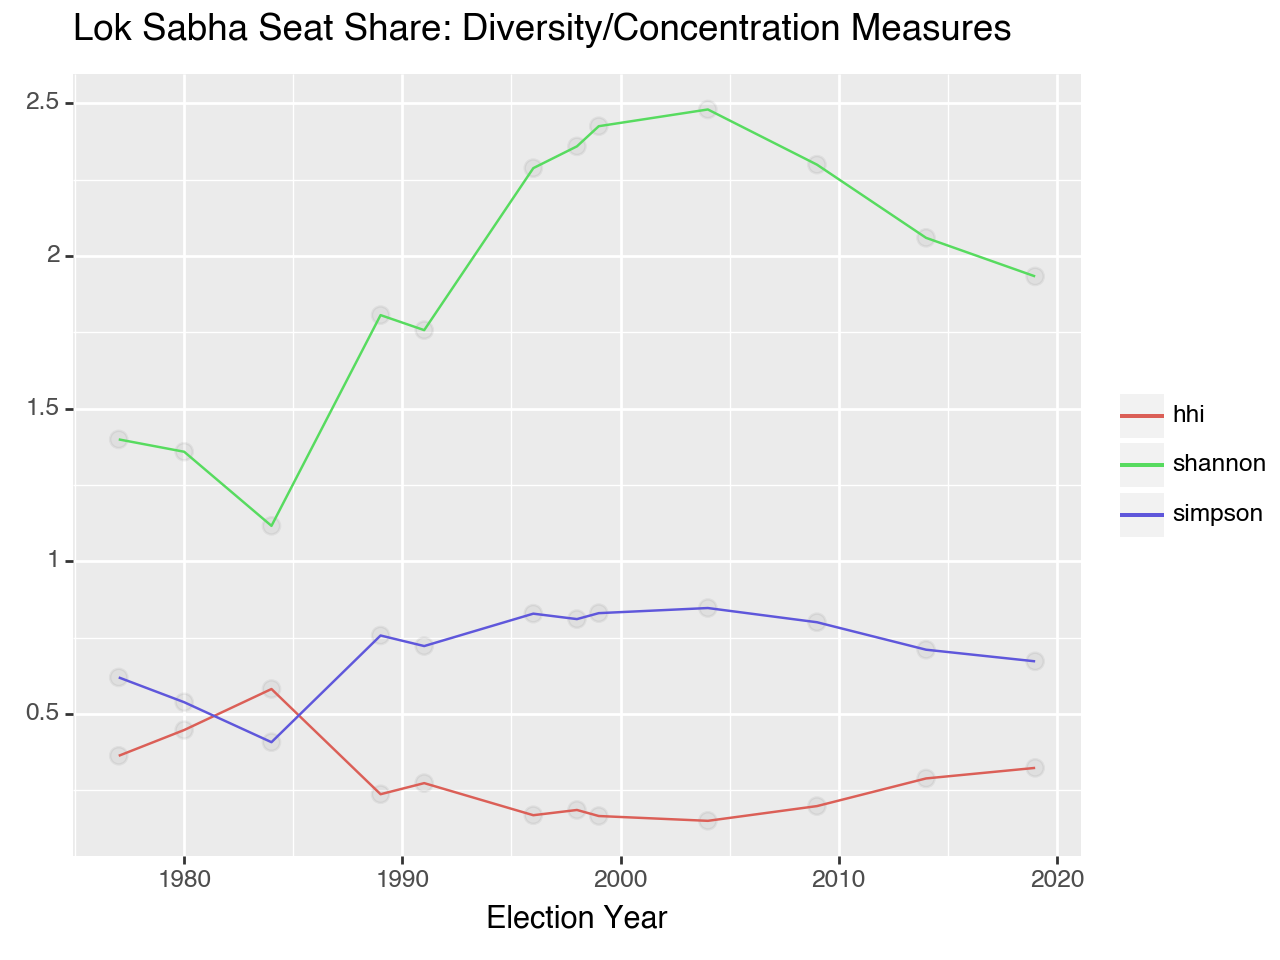

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]


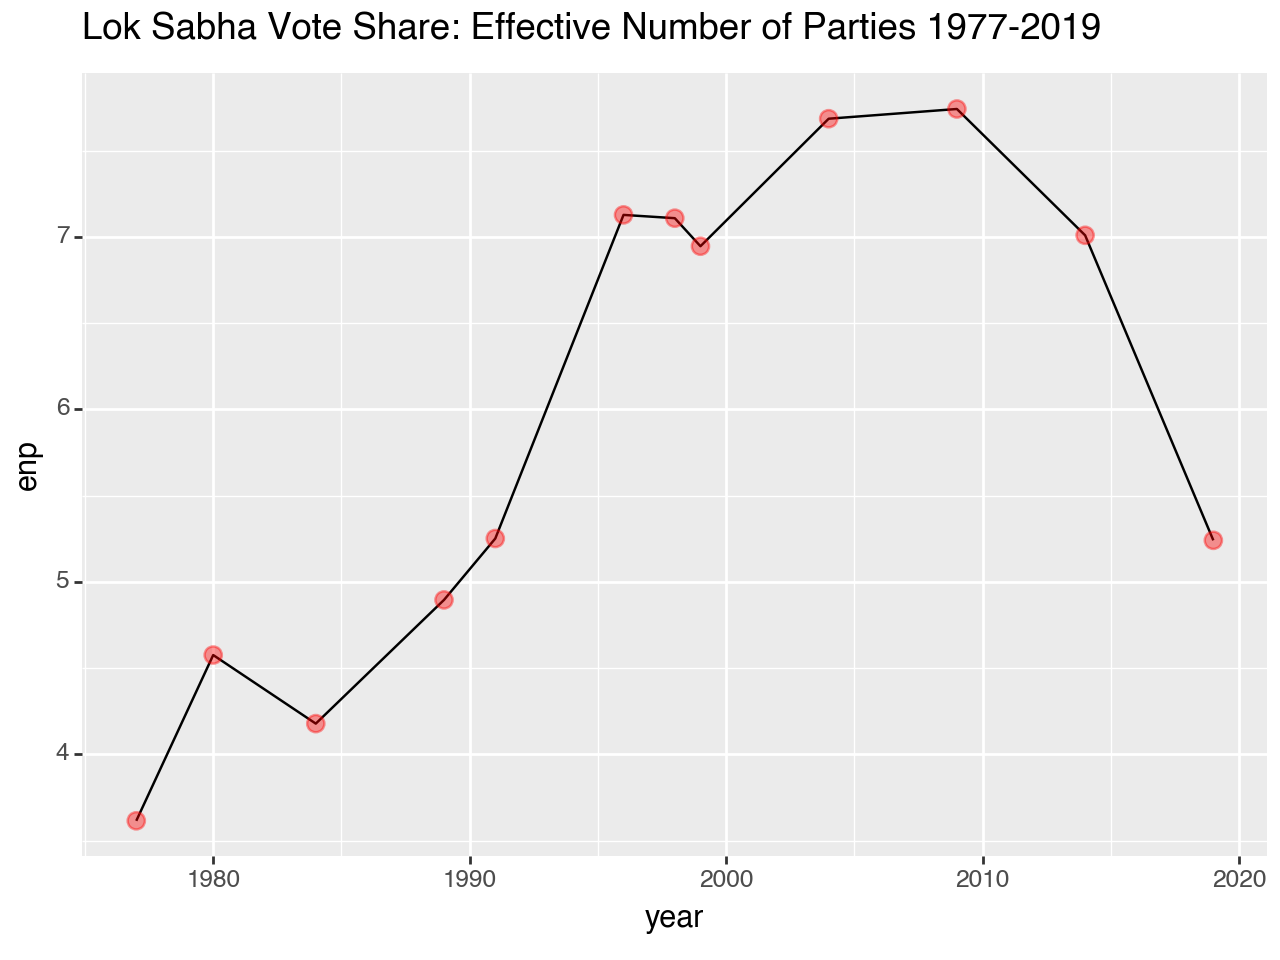

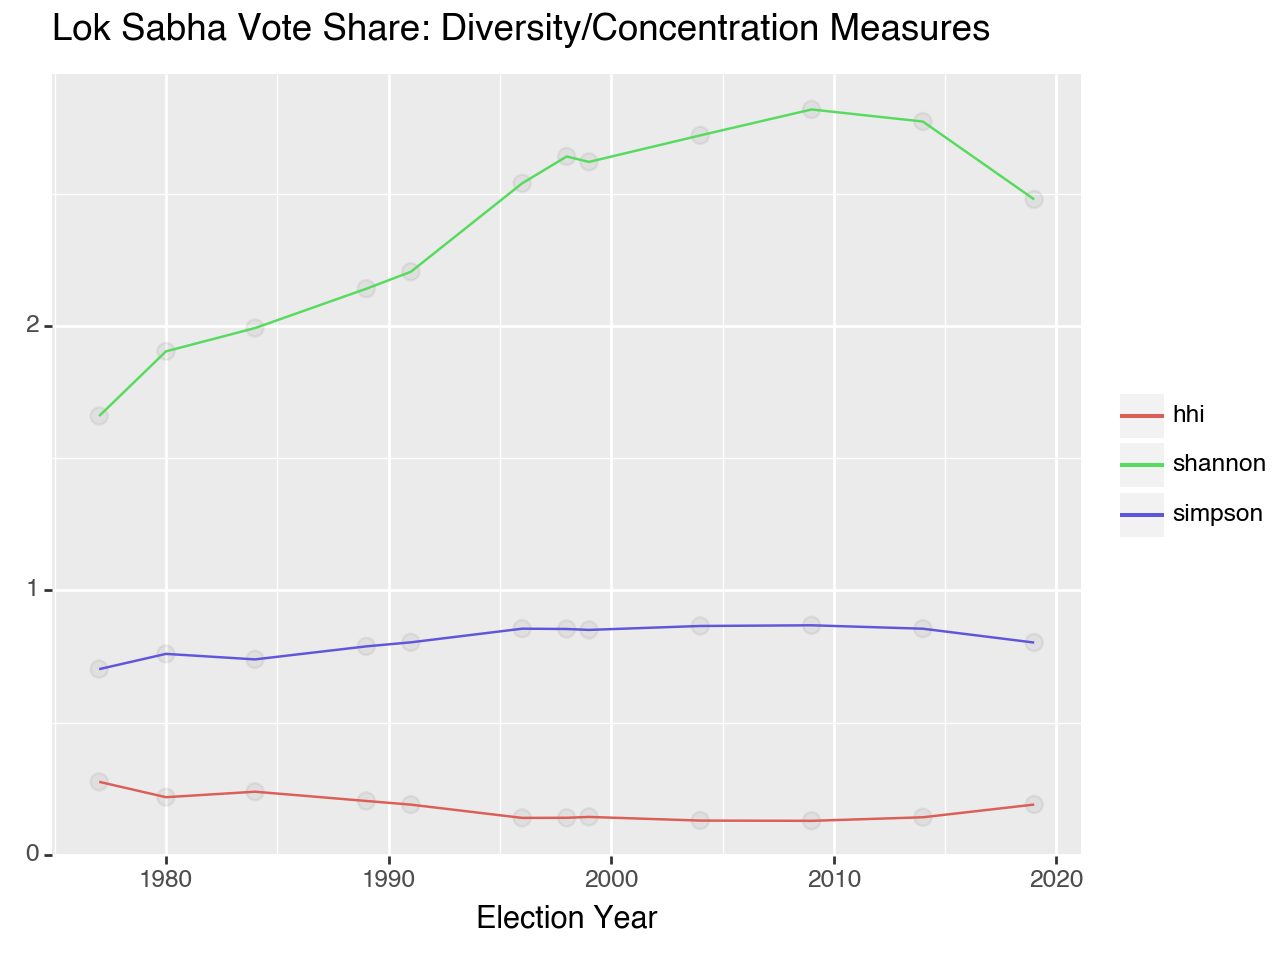

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]


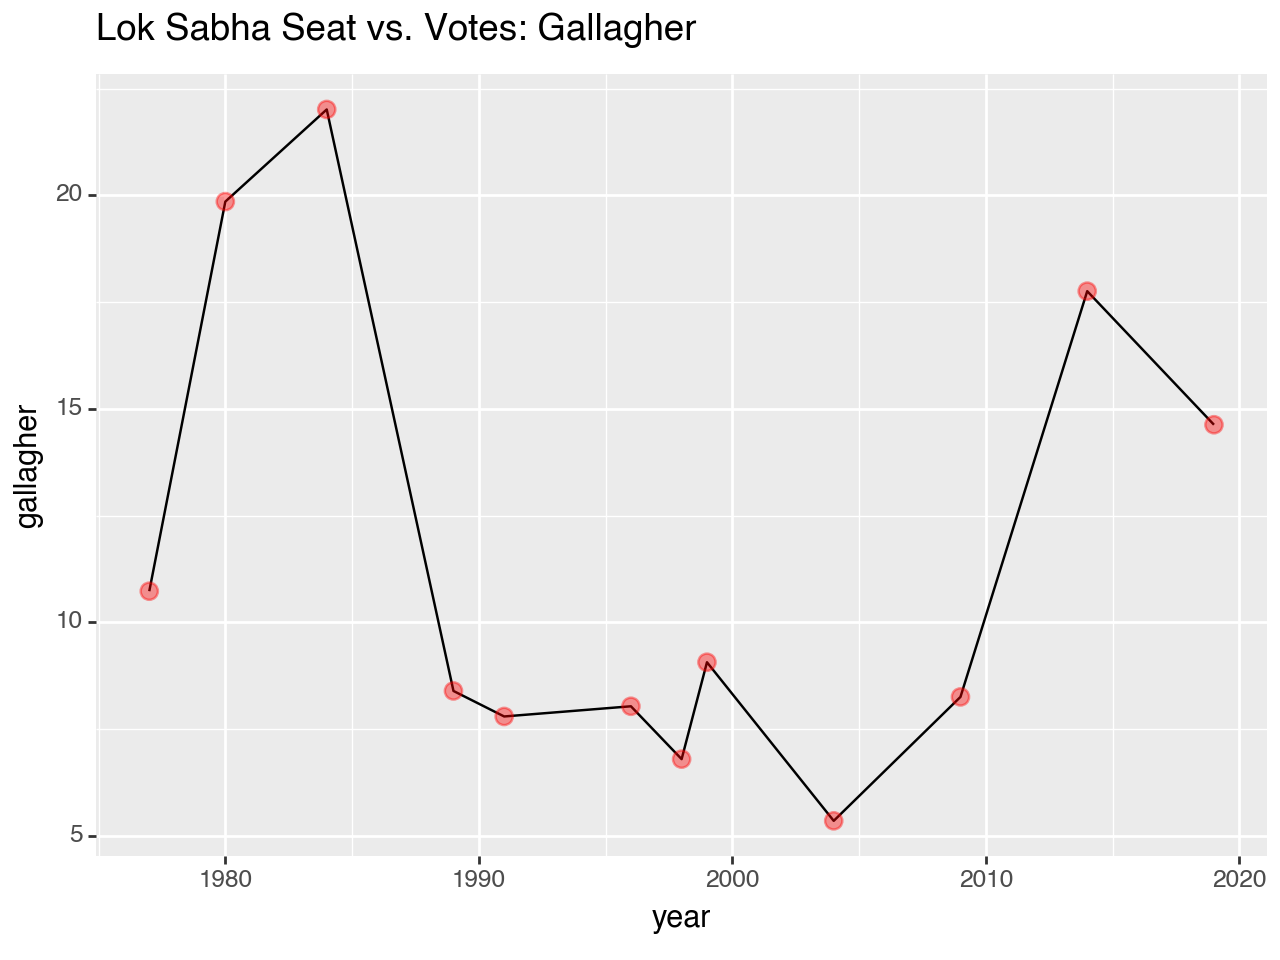

In [3]:
## First for Seats
plots = plot_indices(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['seats']}),
                    "Lok Sabha Seat Share: Effective Number of Parties 1977-2019",
                     "Lok Sabha Seat Share: Diversity/Concentration Measures"
                     )
print(plots)

## then for Votes
plots = plot_indices(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['total_votes']}),
                     "Lok Sabha Vote Share: Effective Number of Parties 1977-2019",
                     "Lok Sabha Vote Share: Diversity/Concentration Measures"
                  )
print(plots)

## Finally gallagher
g1 = ggplot(pd.DataFrame({'year': india_outputs['measures']['year'],
                          'gallagher' : india_outputs['measures']['gallagher']}), 
            aes(x='year', y='gallagher')) + \
    labs(title="Lok Sabha Seat vs. Votes: Gallagher") + \
    geom_line() + \
    geom_point(colour = "red", size = 3,alpha=0.4)

print(g1)

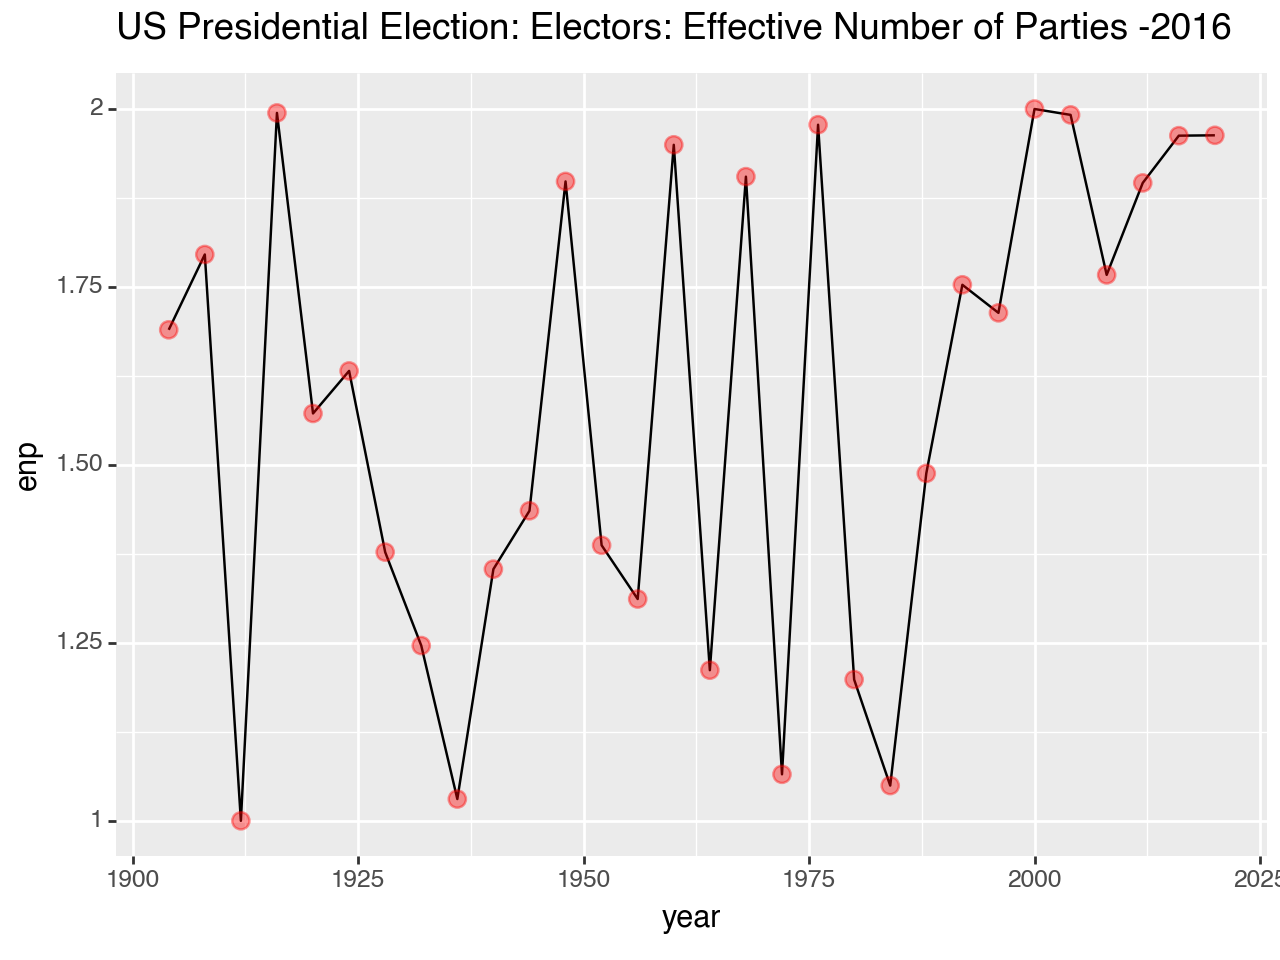

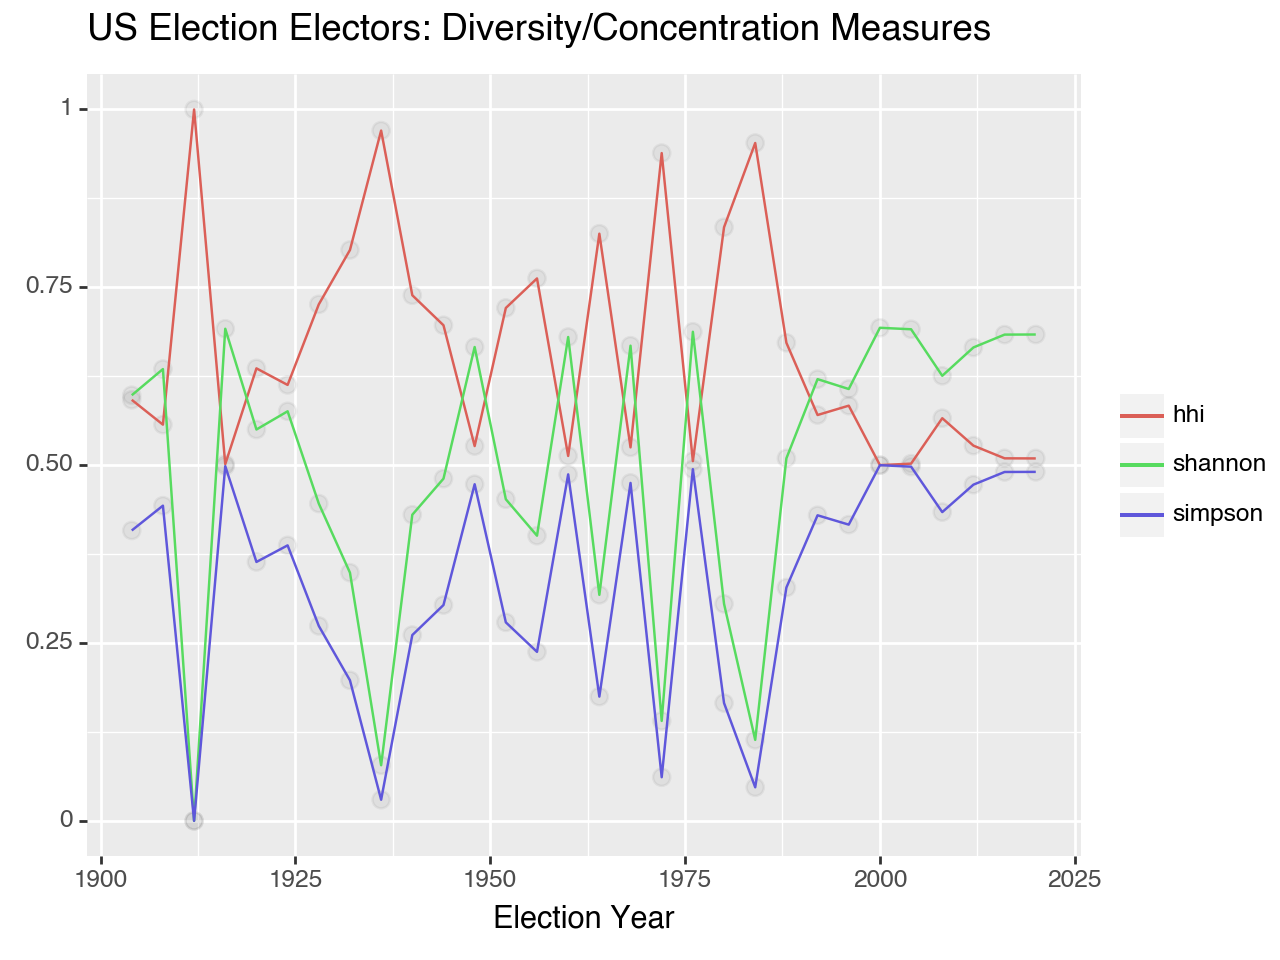

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]


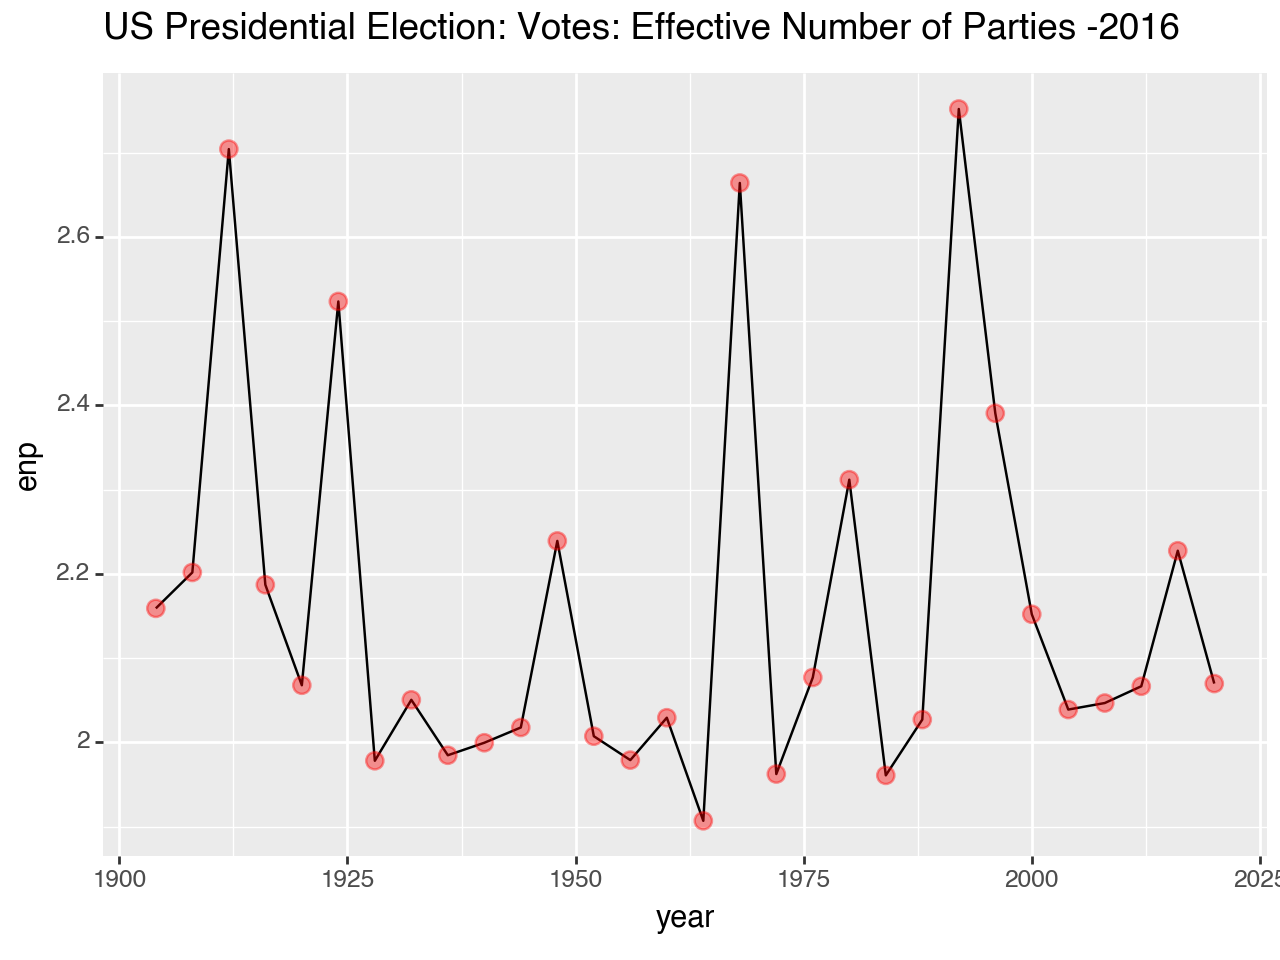

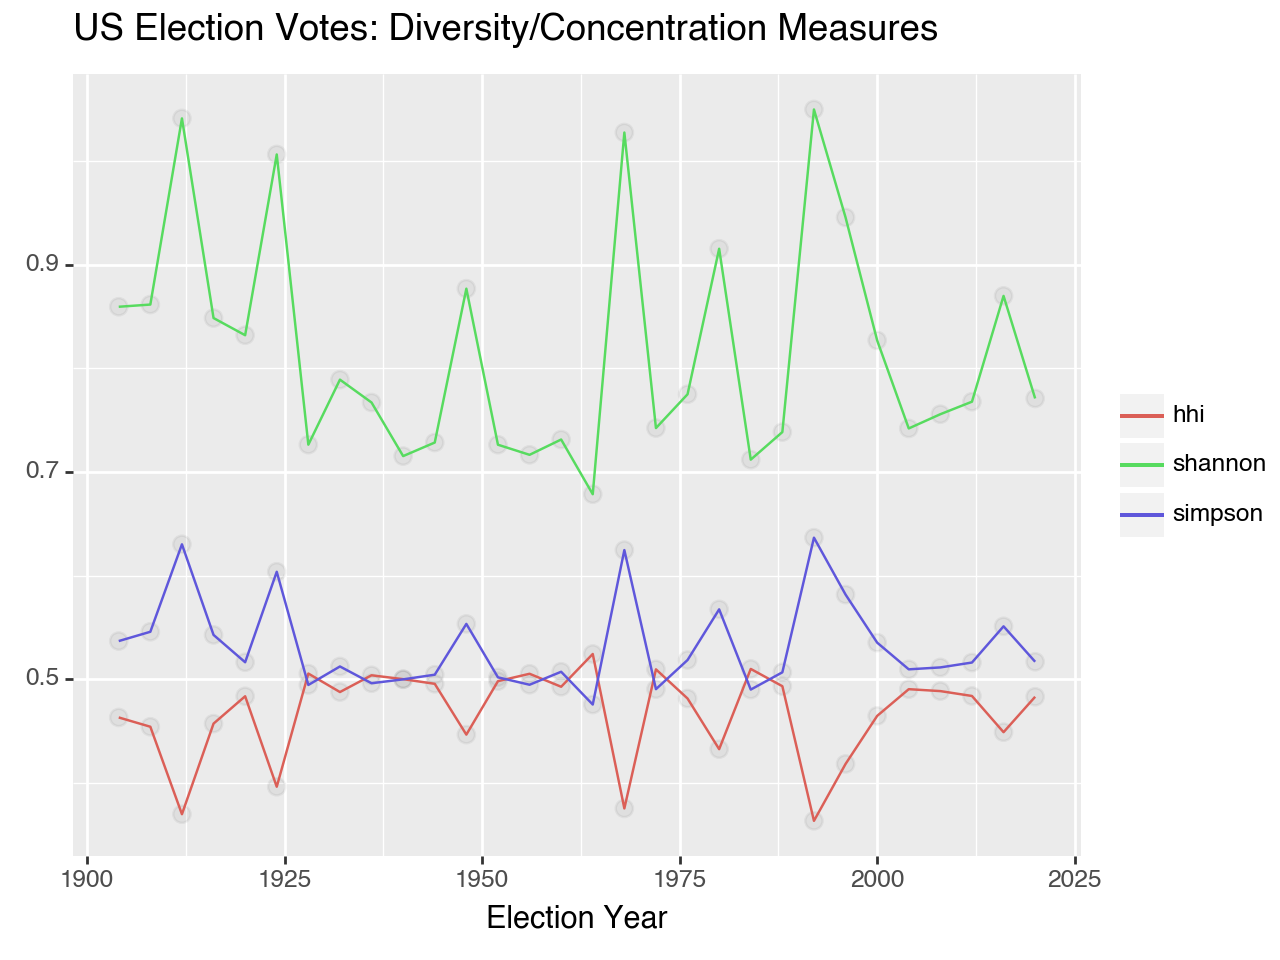

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]


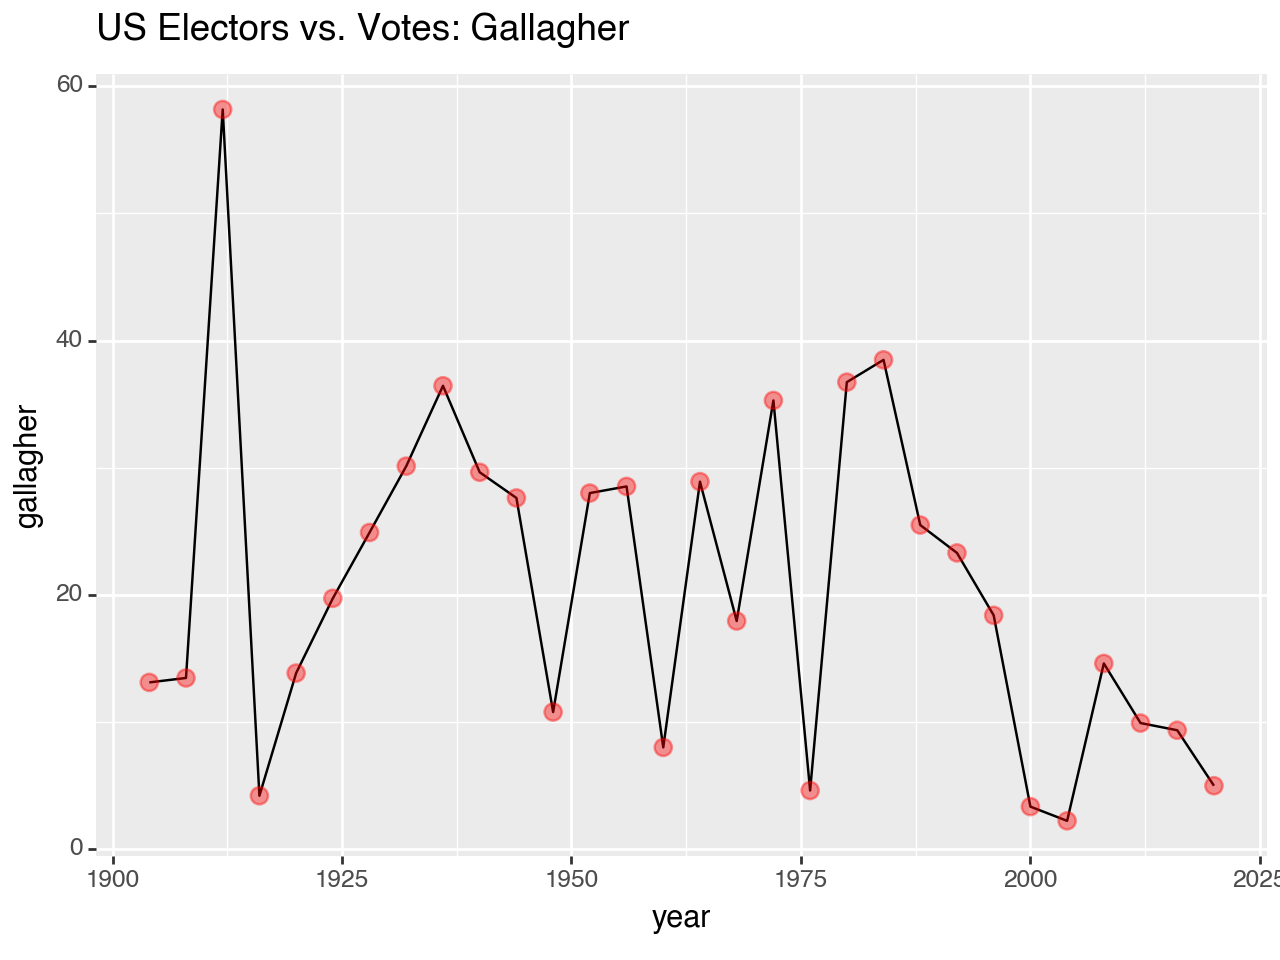

In [4]:
## First for Seats

plots = plot_indices(pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['electors']}),
                                          "US Presidential Election: Electors: Effective Number of Parties -2016",
                     "US Election Electors: Diversity/Concentration Measures"
                     )
print(plots)

## then for Votes

plots = plot_indices(pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['total_votes']}),
                                          "US Presidential Election: Votes: Effective Number of Parties -2016",
                     "US Election Votes: Diversity/Concentration Measures"
                     )
print(plots)

## Finally gallagher
g1 = ggplot(pd.DataFrame({'year': us_outputs['measures']['year'],
                          'gallagher' : us_outputs['measures']['gallagher']}), aes(x='year', y='gallagher')) + \
    labs(title="US Electors vs. Votes: Gallagher") + \
    geom_line() + \
    geom_point(colour = "red", size = 3,alpha=0.4)

print(g1)


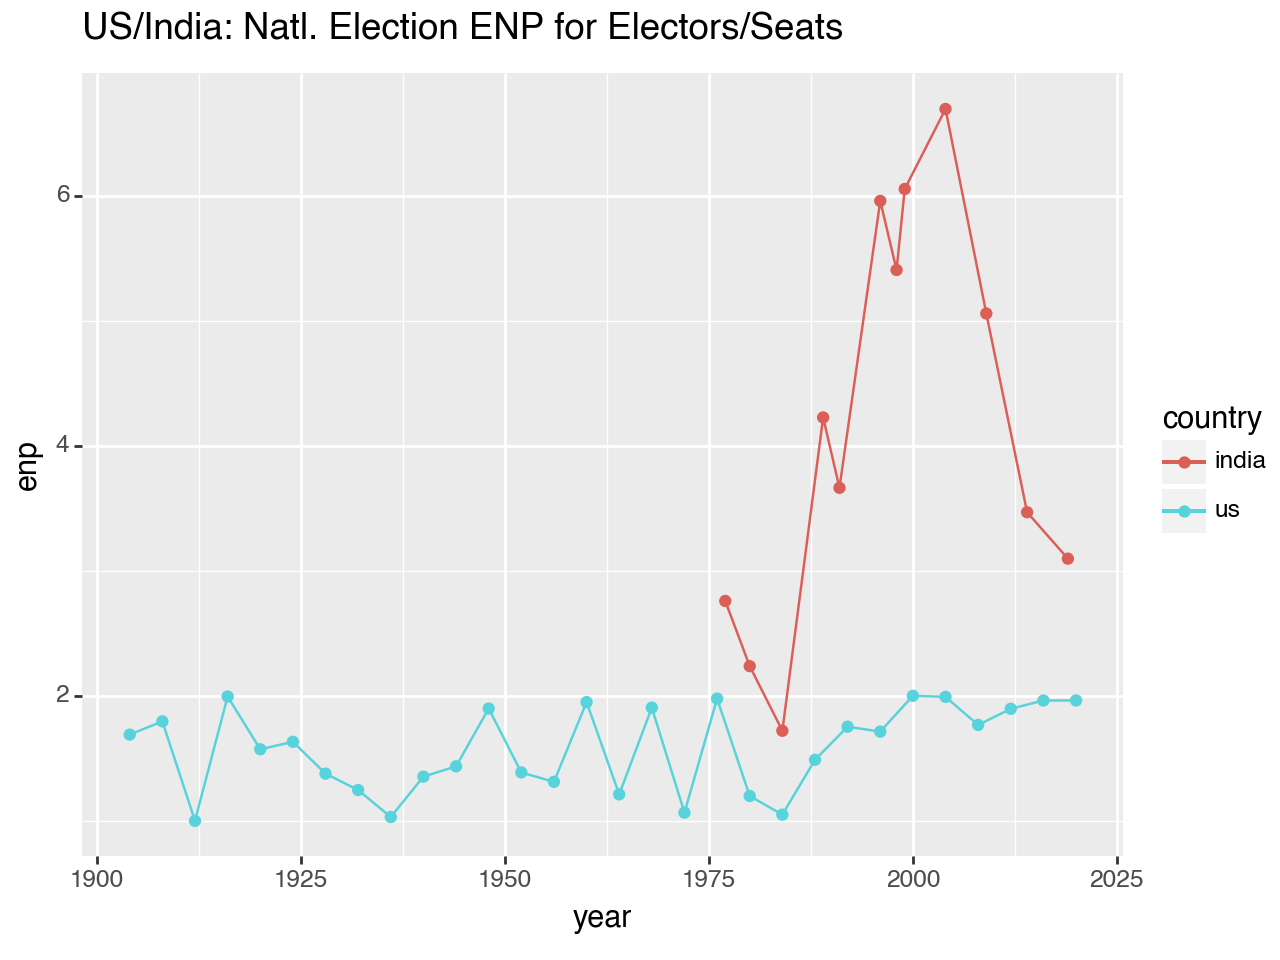

In [6]:
g1 = plot_duo(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['seats']}), 
         pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['electors']}), 
         "US/India: Natl. Election ENP for Electors/Seats")
print(g1)

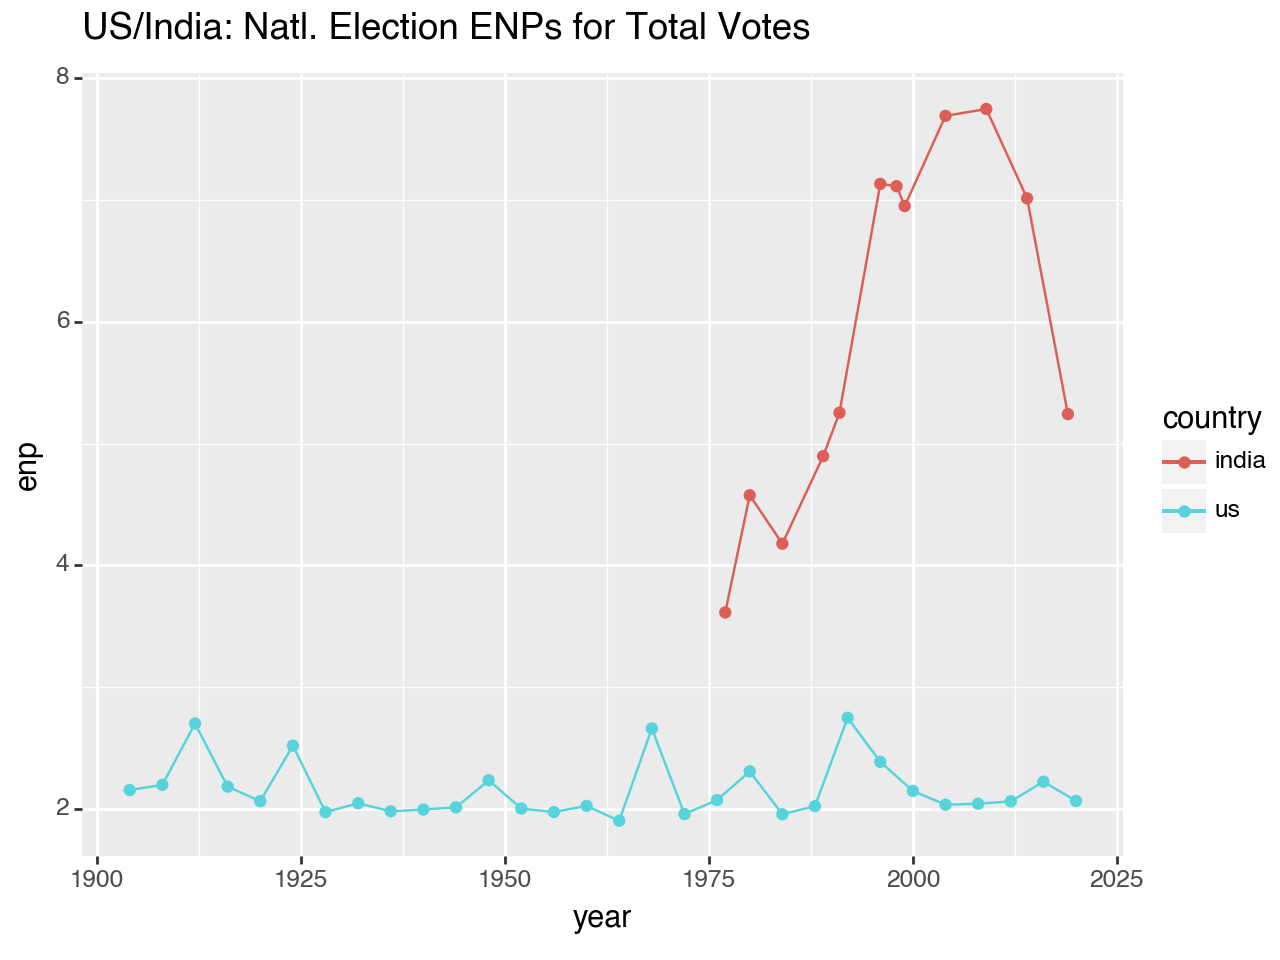

In [5]:
g1 = plot_duo(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['total_votes']}), 
         pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['total_votes']}), 
         "US/India: Natl. Election ENPs for Total Votes")
print(g1)

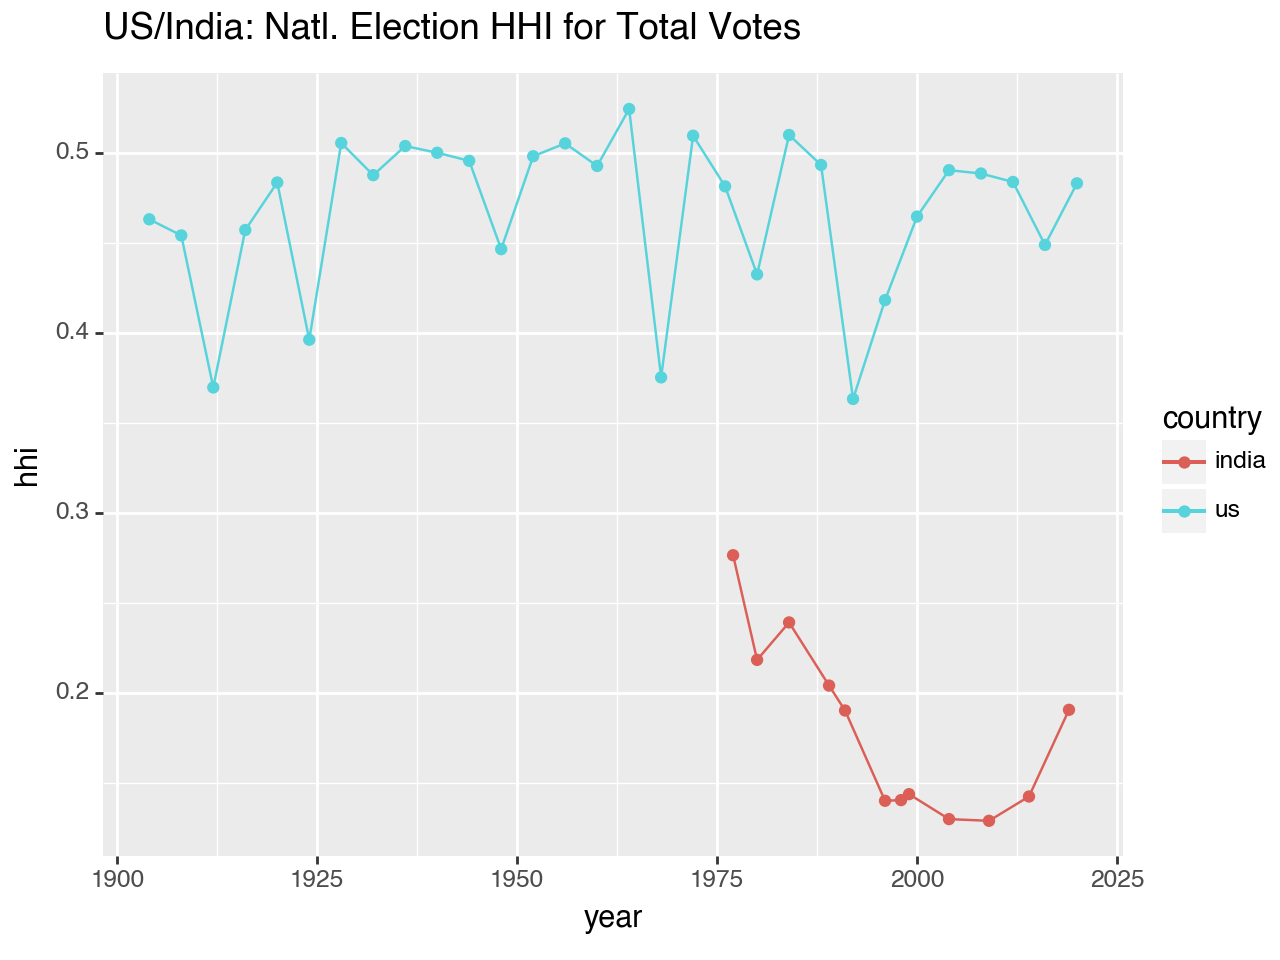

In [4]:
g1 = plot_duo(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['total_votes']}), 
         pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['total_votes']}), 
         "US/India: Natl. Election HHI for Total Votes", measure='hhi')
print(g1)

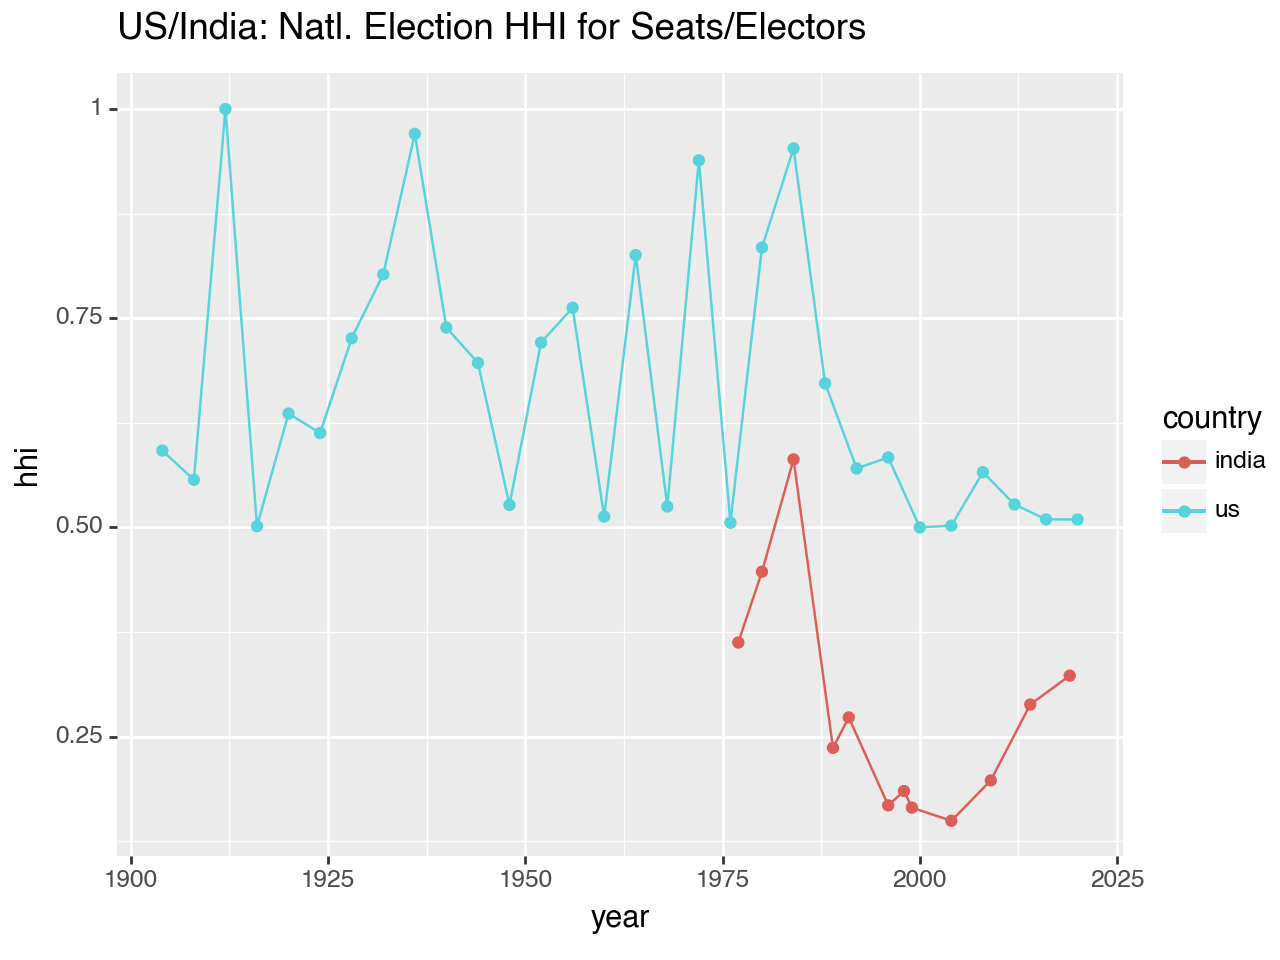

In [5]:
def HHI(india_outputs, us_outputs):
    g1 = plot_duo(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['seats']}), 
         pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['electors']}), 
         "US/India: Natl. Election HHI for Seats/Electors", measure='hhi')
    print(g1)

In [23]:
def gallagher(india_outputs, us_outputs):
    
    df1 = pd.DataFrame({'year': us_outputs['measures']['year'], \
                          'gallagher' : us_outputs['measures']['gallagher']})
    df1['country'] = 'US'
    df2 = pd.DataFrame({'year': india_outputs['measures']['year'], \
                          'gallagher' : india_outputs['measures']['gallagher']})
    df2['country'] = 'India'

    g1 = ggplot(pd.concat([df1,df2]), aes(x='year', y='gallagher', color='country')) + \
        labs(title="US/India - Seats/Electors vs. Votes: Gallagher Index") + \
        geom_line(size=0.75) + \
        geom_point(colour = "black", size = 3,alpha=0.4)

    print(g1)